# Exploring and Preparing Text Data for NLP

Exploring and preparing text data for NLP is important because it helps ensure that the data used to train and test NLP models is relevant, accurate, and representative of the real-world data that the model will encounter. Exploring the data with frequency analysis, sentiment analysis, and topic modeling can provide insights into the characteristics of the data and help identify any issues. 

Preparing the data for training an LLM by splitting it into train, validation, and test sets can help ensure that the model is robust and generalizes well to new data. Overall, effective exploration and preparation of text data is essential for building accurate and effective NLP models.

##  Import Necessary Libraries

In this step, we import the necessary libraries for data exploration and preparation, including Pandas for loading and manipulating data, NLTK for natural language processing tasks, and scikit-learn for machine learning tasks.

In [1]:
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\badhei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Define File Paths

Here, we define the file path to the preprocessed data that we will be exploring and preparing.

In [2]:
preprocessed_data_path = 'datasets/data.csv'

## Load Preprocessed Data

In this step, we load the preprocessed data from the CSV file into a Pandas dataframe, which allows us to manipulate and explore the data using Python.

In [3]:
preprocessed_data = pd.read_csv(preprocessed_data_path)

## Explore Data Using Frequency Analysis

This function takes in a list of preprocessed documents and uses frequency analysis to explore the most common words and phrases in the data. This is an important step in data exploration because it helps us understand the most important features of the data.

In [4]:
def explore_with_frequency_analysis(data):
    tokens = []
    for document in data:
        tokens += document
    fdist = FreqDist(tokens)
    fdist.plot(30)

## Explore Data Using Sentiment Analysis

This function takes in a list of preprocessed documents and uses sentiment analysis to explore the overall sentiment of the data. This is an important step in data exploration because it helps us understand the overall tone and mood of the data.

In [5]:
def explore_with_sentiment_analysis(data):
    sia = SentimentIntensityAnalyzer()
    for document in data:
        print(sia.polarity_scores(document))

## Explore Data Using Topic Modeling

This function takes in a list of preprocessed documents and uses topic modeling to explore the most important topics and themes in the data. This is an important step in data exploration because it helps us understand the underlying patterns and structures in the data.

In [6]:
def explore_with_topic_modeling(data):
    # Convert data to a list if it is a pandas DataFrame or Series
    if isinstance(data, (pd.DataFrame, pd.Series)):
        data = data.tolist()

    if data and isinstance(data, list) and all(isinstance(doc, str) for doc in data):
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(data)
        terms = vectorizer.get_feature_names_out()
        df = pd.DataFrame(X.toarray(), columns=terms)
        print(df.head())
    else:
        print("Input data should be a list of strings.")

## Prepare the Data for Training an LLM

This function takes in a list of preprocessed documents and prepares the data for training a language model by splitting it into train, validation, and test sets and vectorizing the data using a CountVectorizer. This is an important step in data preparation because it provides a clean and structured dataset that can be used for training and testing a language model.

Count vectorizer is an important feature extraction technique in Natural Language Processing (NLP) that converts text data into numerical values. It works by counting the frequency of each word in a given corpus and creating a matrix representation of the text data, where each row corresponds to a document and each column corresponds to a word

In [7]:
def prepare_data_for_training(data):
    vectorizer = CountVectorizer()
    X = [document for document in data]
    y = preprocessed_data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    X_train = vectorizer.fit_transform(X_train)
    X_val = vectorizer.transform(X_val)
    X_test = vectorizer.transform(X_test)
    return X_train, y_train, X_val, y_val, X_test, y_test

## Call the Functions and Prepare the Data

In this final step, we call the functions defined in the previous steps and prepare the data for training a language model. By going through these steps, we have explored and prepared the data in a way that allows us to build a more accurate and effective language model.

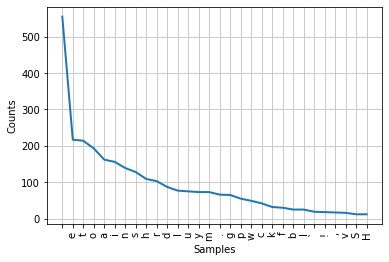

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7501}
{'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'compound': -0.7345}
{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6114}
{'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4738}
{'neg': 0.0, 'neu': 0.363, 'pos': 0.637, 'compound': 0.7405}
{'neg': 0.318, 'neu': 0.437, 'pos': 0.245, 'compound': -0.2103}
{'neg': 0.207, 'neu': 0.669, 'pos': 0.124, 'compound': -0.3048}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.3164}
{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.4228}
{'neg': 0.106, 'neu': 0.78, 'pos': 0.115, 'compound': 0.0516}
{'neg': 0.317, 'neu': 0.573, 'pos': 0.11, 'compound': -0.6908}
{'neg': 0.615, 'neu': 0.385, 'pos': 0.

In [8]:
# Explore the preprocessed data using frequency analysis
explore_with_frequency_analysis(preprocessed_data['text'])
# Explore the preprocessed data using sentiment analysis
explore_with_sentiment_analysis(preprocessed_data['text'])

# Explore the preprocessed data using topic modeling
explore_with_topic_modeling(preprocessed_data['text'])

# Prepare the data for training an LLM
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data_for_training(preprocessed_data['text'])